In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('database.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [4]:
coordinates = df[['Latitude', 'Longitude']]

In [5]:
coordinates

,Latitude,Longitude
0,19.2460,145.6160
1,1.8630,127.3520
2,-20.5790,-173.9720
3,-59.0760,-23.5570
4,11.9380,126.4270
...,...,...
23407,38.3917,-118.8941
23408,38.3777,-118.8957
23409,36.9179,140.4262
23410,-9.0283,118.6639


In [6]:
scaler = StandardScaler()
coordinates_normalized = scaler.fit_transform(coordinates)

In [7]:
coordinates_normalized

array([[ 0.58337712,  0.84436817],
       [ 0.00610931,  0.69884905],
       [-0.7391616 , -1.70196151],
       ...,
       [ 1.17023895,  0.80301824],
       [-0.35557722,  0.62962628],
       [ 1.18615923,  0.81085909]])

In [8]:
from sklearn.cluster import KMeans
wcss = []

In [9]:
for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init=10)
    kmeans.fit(coordinates_normalized)
    wcss.append(kmeans.inertia_)

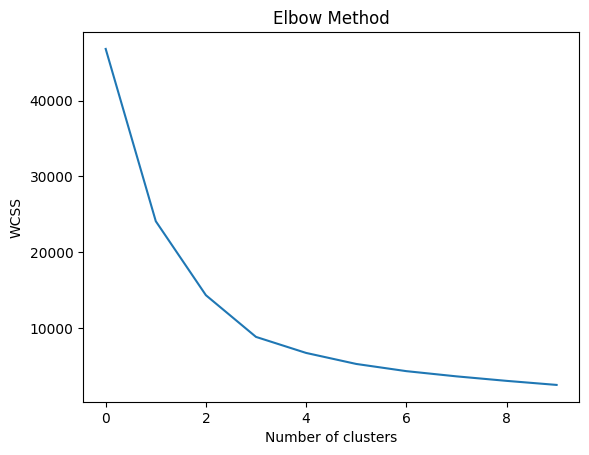

In [10]:
plt.plot(wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10).fit(coordinates_normalized)

In [12]:
labels = kmeans.labels_

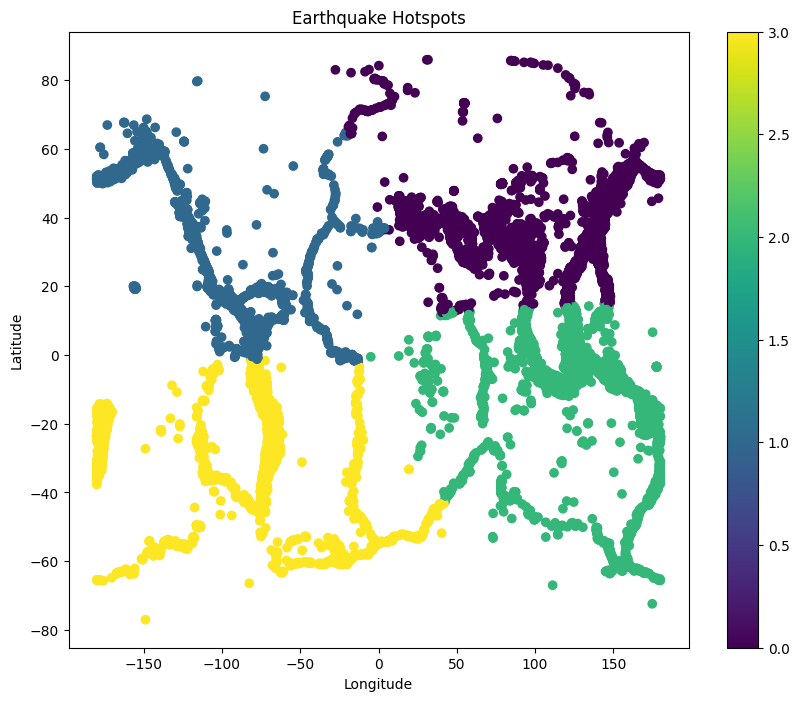

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], c=labels, cmap='viridis')
plt.title('Earthquake Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
plt.show()